![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/Training/multi_lingual/multi_class_text_classification/NLU_training_multi_lingual_multi_class_text_classifier_demo_hotel_reviews.ipynb)



# Training a Deep Learning Classifier with NLU 
## ClassifierDL (Multi-class Text Classification)
## 3 class Tripadvisor Hotel review classifier training
With the [ClassifierDL model](https://nlp.johnsnowlabs.com/docs/en/annotators#classifierdl-multi-class-text-classification) from Spark NLP you can achieve State Of the Art results on any multi class text classification problem 

This notebook showcases the following features : 

- How to train the deep learning classifier
- How to store a pipeline to disk
- How to load the pipeline from disk (Enables NLU offline mode)

You can achieve these results or even better on this dataset with training data :

<br>

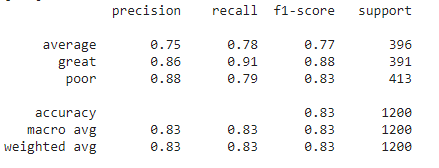


You can achieve these results or even better on this dataset with test data :

<br>


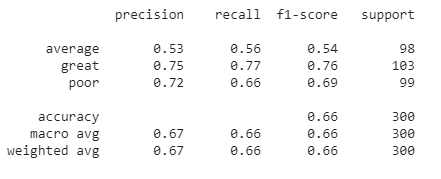

# 1. Install Java 8 and NLU

In [ ]:
!wget https://setup.johnsnowlabs.com/nlu/colab.sh -O - | bash
  

import nlu

--2021-05-05 06:17:34--  https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1671 (1.6K) [text/plain]
Saving to: ‘STDOUT’

-                   100%[===================>]   1.63K  --.-KB/s    in 0s      

2021-05-05 06:17:34 (33.3 MB/s) - written to stdout [1671/1671]

Installing  NLU 3.0.0 with  PySpark 3.0.2 and Spark NLP 3.0.1 for Google Colab ...
     |████████████████████████████████| 204.8MB 68kB/s 
     |████████████████████████████████| 153kB 40.2MB/s 
     |████████████████████████████████| 204kB 18.6MB/s 
     |████████████████████████████████| 204kB 37.1MB/s 


# 2. Download hotel reviews  dataset 
https://www.kaggle.com/andrewmvd/trip-advisor-hotel-reviews

Hotels play a crucial role in traveling and with the increased access to information new pathways of selecting the best ones emerged.
With this dataset, consisting of 20k reviews crawled from Tripadvisor, you can explore what makes a great hotel and maybe even use this model in your travels!


In [ ]:
! wget http://ckl-it.de/wp-content/uploads/2021/02/tripadvisor_hotel_reviews_multi_lingual.csv


--2021-05-05 06:19:28--  http://ckl-it.de/wp-content/uploads/2021/02/tripadvisor_hotel_reviews_multi_lingual.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5332717 (5.1M) [text/csv]
Saving to: ‘tripadvisor_hotel_reviews_multi_lingual.csv’

tripadvisor_hotel_r 100%[===================>]   5.08M  3.76MB/s    in 1.4s    

2021-05-05 06:19:30 (3.76 MB/s) - ‘tripadvisor_hotel_reviews_multi_lingual.csv’ saved [5332717/5332717]



In [ ]:
import pandas as pd
test_path = '/content/tripadvisor_hotel_reviews_multi_lingual.csv'
train_df = pd.read_csv(test_path,sep=",")
cols = ["y","text"]
train_df = train_df[cols]
from sklearn.model_selection import train_test_split
train_df = train_df.iloc[:1500]
train_df, test_df = train_test_split(train_df, test_size=0.2)
train_df



,y,text
819,great,wonderful weekend fairmont copley plaza enjoye...
338,great,"nice stayed silver cloud pre-cruise, impressed..."
556,great,best deal town n't mind shabby lobby moore hot...
1057,great,great experience just got rio mar yesterday mi...
400,poor,hospital stayed 2 weeks got sick stomach upset...
...,...,...
1410,great,"great time westin rio mar, know like reading r..."
1283,poor,different used stayed el san juan total 5 time...
1133,average,modern hilton good location stay area pretty r...
1207,average,nothing spectacular chosen weekend getaway bui...


# 3. Train Deep Learning Classifier using nlu.load('train.classifier')

You dataset label column should be named 'y' and the feature column with text data should be named 'text'

In [ ]:
trainable_pipe = nlu.load('xx.embed_sentence.labse train.classifier')
# We need to train longer and user smaller LR for NON-USE based sentence embeddings usually
# We could tune the hyperparameters further with hyperparameter tuning methods like gridsearch
# Also longer training gives more accuracy
trainable_pipe['trainable_classifier_dl'].setMaxEpochs(60)  
trainable_pipe['trainable_classifier_dl'].setLr(0.005) 
fitted_pipe = trainable_pipe.fit(train_df)
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
from sklearn.metrics import classification_report
print(classification_report(preds['y'], preds['classifier_dl']))

preds

labse download started this may take some time.
Approximate size to download 1.7 GB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]
              precision    recall  f1-score   support

     average       0.75      0.78      0.77       396
       great       0.86      0.91      0.88       391
        poor       0.88      0.79      0.83       413

    accuracy                           0.83      1200
   macro avg       0.83      0.83      0.83      1200
weighted avg       0.83      0.83      0.83      1200



,sentence_embedding_labse,trained_classifier,document,sentence,trained_classifier_confidence_confidence,y,origin_index,text
0,"[0.042161960154771805, 0.0009784834692254663, ...",great,wonderful weekend fairmont copley plaza enjoye...,[wonderful weekend fairmont copley plaza enjoy...,0.999989,great,819,wonderful weekend fairmont copley plaza enjoye...
1,"[0.028560785576701164, 0.076837457716465, -0.0...",great,"nice stayed silver cloud pre-cruise, impressed...","[nice stayed silver cloud pre-cruise, impresse...",0.999971,great,338,"nice stayed silver cloud pre-cruise, impressed..."
2,"[-0.04284599423408508, 0.031210748478770256, -...",poor,best deal town n't mind shabby lobby moore hot...,[best deal town n't mind shabby lobby moore ho...,0.651085,great,556,best deal town n't mind shabby lobby moore hot...
3,"[-0.0364091582596302, 0.006750240921974182, 0....",great,great experience just got rio mar yesterday mi...,[great experience just got rio mar yesterday m...,0.998592,great,1057,great experience just got rio mar yesterday mi...
4,"[-0.01341036893427372, 0.01906048320233822, 0....",poor,hospital stayed 2 weeks got sick stomach upset...,[hospital stayed 2 weeks got sick stomach upse...,0.999999,poor,400,hospital stayed 2 weeks got sick stomach upset...
...,...,...,...,...,...,...,...,...
1195,"[-0.07303472608327866, -0.0014495996292680502,...",great,"great time westin rio mar, know like reading r...","[great time westin rio mar, know like reading ...",0.999355,great,1410,"great time westin rio mar, know like reading r..."
1196,"[-0.04543023928999901, 0.040597811341285706, -...",poor,different used stayed el san juan total 5 time...,[different used stayed el san juan total 5 tim...,0.999191,poor,1283,different used stayed el san juan total 5 time...
1197,"[-0.020267890766263008, 0.05014576390385628, -...",average,modern hilton good location stay area pretty r...,[modern hilton good location stay area pretty ...,0.999984,average,1133,modern hilton good location stay area pretty r...
1198,"[-0.019527727738022804, 0.05594026297330856, -...",average,nothing spectacular chosen weekend getaway bui...,[nothing spectacular chosen weekend getaway bu...,0.998562,average,1207,nothing spectacular chosen weekend getaway bui...


# 3.1 evaluate on Test Data

In [ ]:
preds = fitted_pipe.predict(test_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['classifier_dl']))

              precision    recall  f1-score   support

     average       0.53      0.56      0.54        98
       great       0.75      0.77      0.76       103
        poor       0.72      0.66      0.69        99

    accuracy                           0.66       300
   macro avg       0.67      0.66      0.66       300
weighted avg       0.67      0.66      0.66       300



#4.  Test Model  with  20 languages!

In [ ]:
train_df = pd.read_csv("tripadvisor_hotel_reviews_multi_lingual.csv")
preds = fitted_pipe.predict(train_df[["test_sentences","y"]].iloc[:100],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['classifier_dl']))

preds

              precision    recall  f1-score   support

     average       0.41      0.55      0.47        33
       great       0.66      0.66      0.66        35
        poor       0.81      0.53      0.64        32

    accuracy                           0.58       100
   macro avg       0.63      0.58      0.59       100
weighted avg       0.62      0.58      0.59       100



,sentence_embedding_labse,trained_classifier,document,sentence,trained_classifier_confidence_confidence,y,origin_index,text
0,"[-0.013124360702931881, -0.010088308714330196,...",average,Tolles Hotel 5 Nächte Ende August 2005. Reserv...,"[Tolles Hotel 5 Nächte Ende August 2005., Rese...",0.993889,great,0,Tolles Hotel 5 Nächte Ende August 2005. Reserv...
1,"[0.021132875233888626, 0.06491417437791824, -0...",average,"தூண்டில் மற்றும் சுவிட்ச் அறை விகிதங்கள், ஏற்ற...","[தூண்டில் மற்றும் சுவிட்ச் அறை விகிதங்கள், ஏற்...",0.884120,poor,1,"தூண்டில் மற்றும் சுவிட்ச் அறை விகிதங்கள், ஏற்ற..."
2,"[-0.014877039939165115, 0.08078614622354507, -...",average,បន្ទប់ឆែកល្អចូលចិត្តសណ្ឋាគារទីតាំងល្អមិត្តភាព។...,[បន្ទប់ឆែកល្អចូលចិត្តសណ្ឋាគារទីតាំងល្អមិត្តភាព...,0.999971,average,2,បន្ទប់ឆែកល្អចូលចិត្តសណ្ឋាគារទីតាំងល្អមិត្តភាព។...
3,"[-0.051047880202531815, 0.04952175170183182, -...",great,beste Lage Wert Eigenschaften Waikiki Kopf Hot...,[beste Lage Wert Eigenschaften Waikiki Kopf Ho...,0.995766,great,3,beste Lage Wert Eigenschaften Waikiki Kopf Hot...
4,"[-0.04287628456950188, 0.011480937711894512, -...",poor,botel not recommended little disappointed hone...,[botel not recommended little disappointed hon...,0.999344,poor,4,botel not recommended little disappointed hone...
...,...,...,...,...,...,...,...,...
95,"[-0.0008096122182905674, 0.03655293583869934, ...",average,موقع رائع قضى 7 أيام في نزل القلعة في بداية ال...,[موقع رائع قضى 7 أيام في نزل القلعة في بداية ا...,0.998497,great,95,موقع رائع قضى 7 أيام في نزل القلعة في بداية ال...
96,"[-0.005492118652909994, 0.05503822863101959, -...",great,super emplacement les lits durs ont vraiment a...,[super emplacement les lits durs ont vraiment ...,0.999948,average,96,super emplacement les lits durs ont vraiment a...
97,"[0.009459477849304676, 0.006773392669856548, -...",average,ทำเลที่ตั้งดีเยี่ยมโรงแรมที่สมบูรณ์แบบตรงกลางน...,[ทำเลที่ตั้งดีเยี่ยมโรงแรมที่สมบูรณ์แบบตรงกลาง...,0.986078,great,97,ทำเลที่ตั้งดีเยี่ยมโรงแรมที่สมบูรณ์แบบตรงกลางน...
98,"[-0.06341180950403214, 0.03327464684844017, -0...",average,"gerade anfangen, Glanz zu verlieren, blieb Kan...","[gerade anfangen, Glanz zu verlieren, blieb Ka...",0.793590,great,98,"gerade anfangen, Glanz zu verlieren, blieb Kan..."


# The Model understands Englsih
![en](https://www.worldometers.info/img/flags/small/tn_nz-flag.gif)

In [ ]:
fitted_pipe.predict("It was the best stay of my life, I loved it!! ")


,sentence_embedding_labse,trained_classifier,document,sentence,trained_classifier_confidence_confidence,origin_index
0,"[0.025105198845267296, -0.0444340780377388, -0...",great,"It was the best stay of my life, I loved it!!","[It was the best stay of my life, I loved it!, !]",0.999519,0


In [ ]:
fitted_pipe.predict("It was the worst stay of my life, I hated it!! ")


,sentence_embedding_labse,trained_classifier,document,sentence,trained_classifier_confidence_confidence,origin_index
0,"[0.02957884594798088, -0.042081158608198166, -...",poor,"It was the worst stay of my life, I hated it!!","[It was the worst stay of my life, I hated it!...",0.997514,0


# The Model understands German
![de](https://www.worldometers.info/img/flags/small/tn_gm-flag.gif)

In [ ]:
# German for: 'It was the best stay of my life, I loved it!!'
fitted_pipe.predict("Es war der beste Aufenthalt meines Lebens, ich habe es geliebt !! ")

,sentence_embedding_labse,trained_classifier,document,sentence,trained_classifier_confidence_confidence,origin_index
0,"[0.025617901235818863, -0.050006747245788574, ...",great,"Es war der beste Aufenthalt meines Lebens, ich...","[Es war der beste Aufenthalt meines Lebens, ic...",0.999732,0


In [ ]:
		
# German for: 'It was the worst stay of my life, I hated it!!'
fitted_pipe.predict("Es war der schlimmste Aufenthalt meines Lebens, ich hasste es !! ")
		

,sentence_embedding_labse,trained_classifier,document,sentence,trained_classifier_confidence_confidence,origin_index
0,"[0.022492462769150734, -0.05308641120791435, -...",poor,Es war der schlimmste Aufenthalt meines Lebens...,[Es war der schlimmste Aufenthalt meines Leben...,0.973955,0


# The Model understands Chinese
![zh](https://www.worldometers.info/img/flags/small/tn_ch-flag.gif)

In [ ]:
# Chinese for: 'It was the best stay of my life, I loved it!!'
fitted_pipe.predict("这是我一生中最美好的时光，我喜欢它！！ ")

,sentence_embedding_labse,trained_classifier,document,sentence,trained_classifier_confidence_confidence,origin_index
0,"[0.011552233248949051, -0.06316248327493668, -...",great,这是我一生中最美好的时光，我喜欢它！！,[这是我一生中最美好的时光，我喜欢它！！],0.999965,0


In [ ]:
# Chinese for: 'It was awful!! '
fitted_pipe.predict("太糟糕了!!")

,sentence_embedding_labse,trained_classifier,document,sentence,trained_classifier_confidence_confidence,origin_index
0,"[-0.025874070823192596, -0.0665956661105156, -...",poor,太糟糕了!!,[太糟糕了!!],0.999621,0


# Model understands Afrikaans

![af](https://www.worldometers.info/img/flags/small/tn_sf-flag.gif)



In [ ]:
		
#  Afrikaans for: 'It was the best stay of my life, I loved it!!'
fitted_pipe.predict("Dit was die beste verblyf in my lewe, ek was mal daaroor !! ")

,sentence_embedding_labse,trained_classifier,document,sentence,trained_classifier_confidence_confidence,origin_index
0,"[0.027523020282387733, -0.034727904945611954, ...",great,"Dit was die beste verblyf in my lewe, ek was m...","[Dit was die beste verblyf in my lewe, ek was ...",0.999458,0


In [ ]:
#  Afrikaans for: 'It was the worst stay of my life, I hated it!!'
fitted_pipe.predict("Dit was die slegste verblyf in my lewe, ek het dit gehaat !! ")

,sentence_embedding_labse,trained_classifier,document,sentence,trained_classifier_confidence_confidence,origin_index
0,"[0.020533405244350433, -0.044794000685214996, ...",poor,"Dit was die slegste verblyf in my lewe, ek het...","[Dit was die slegste verblyf in my lewe, ek he...",0.994397,0


# The model understands Vietnamese
![vi](https://www.worldometers.info/img/flags/small/tn_vm-flag.gif)

In [ ]:
# Vietnamese for: 'It was the best stay of my life, I loved it!!'
fitted_pipe.predict("Đó là kỳ nghỉ tuyệt vời nhất trong đời tôi, tôi yêu nó !! ")
		

,sentence_embedding_labse,trained_classifier,document,sentence,trained_classifier_confidence_confidence,origin_index
0,"[0.022074803709983826, -0.06135039031505585, -...",great,"Đó là kỳ nghỉ tuyệt vời nhất trong đời tôi, tô...","[Đó là kỳ nghỉ tuyệt vời nhất trong đời tôi, t...",0.987656,0


In [ ]:
# Vietnamese for: 'It was awful!! '
fitted_pipe.predict("Nó quá tệ!! ")

,sentence_embedding_labse,trained_classifier,document,sentence,trained_classifier_confidence_confidence,origin_index
0,"[-0.011885211803019047, -0.06412354856729507, ...",poor,Nó quá tệ!!,"[Nó quá tệ!, !]",0.999769,0


# The model understands Japanese
![ja](https://www.worldometers.info/img/flags/small/tn_ja-flag.gif)


In [ ]:
# Japanese for: 'It was the best stay of my life, I loved it!!'
fitted_pipe.predict("それは私の人生で最高の滞在でした、私はそれを愛していました!! ")

,sentence_embedding_labse,trained_classifier,document,sentence,trained_classifier_confidence_confidence,origin_index
0,"[0.03218996152281761, -0.045211367309093475, -...",great,それは私の人生で最高の滞在でした、私はそれを愛していました!!,[それは私の人生で最高の滞在でした、私はそれを愛していました!!],0.999946,0


In [ ]:
# Japanese for: 'It was the worst stay of my life, I hated it!!'
fitted_pipe.predict("人生最悪の滞在でした、嫌いでした!! ")

,sentence_embedding_labse,trained_classifier,document,sentence,trained_classifier_confidence_confidence,origin_index
0,"[0.0015585105866193771, -0.04200108349323273, ...",poor,人生最悪の滞在でした、嫌いでした!!,[人生最悪の滞在でした、嫌いでした!!],0.999895,0


# The model understands Zulu
![zu](https://www.worldometers.info/img/flags/small/tn_sf-flag.gif)

In [ ]:
#  Zulu for: 'It was the best stay of my life, I loved it!!'
fitted_pipe.predict("Kwakungukuhlala okuhle kakhulu empilweni yami, ngangikuthanda !! ")

,sentence_embedding_labse,trained_classifier,document,sentence,trained_classifier_confidence_confidence,origin_index
0,"[0.020903216674923897, -0.05406734347343445, -...",great,"Kwakungukuhlala okuhle kakhulu empilweni yami,...",[Kwakungukuhlala okuhle kakhulu empilweni yami...,0.999816,0


In [ ]:
#  Zulu for: 'It was the worst stay of my life, I hated it!!'
fitted_pipe.predict("Kwakuwukuhlala okubi kakhulu empilweni yami, ngangikuzonda !! ")
		

,sentence_embedding_labse,trained_classifier,document,sentence,trained_classifier_confidence_confidence,origin_index
0,"[0.012615696527063847, -0.05433850735425949, -...",poor,"Kwakuwukuhlala okubi kakhulu empilweni yami, n...","[Kwakuwukuhlala okubi kakhulu empilweni yami, ...",0.998103,0


# The  Model understands Turkish
![tr](https://www.worldometers.info/img/flags/small/tn_tu-flag.gif)

In [ ]:

#  Turkish for: 'It was the best stay of my life, I loved it!!'
fitted_pipe.predict("Hayatımın en iyi kalışıydı, onu sevdim! ")

,sentence_embedding_labse,trained_classifier,document,sentence,trained_classifier_confidence_confidence,origin_index
0,"[0.01813078671693802, -0.01860048621892929, -0...",great,"Hayatımın en iyi kalışıydı, onu sevdim!","[Hayatımın en iyi kalışıydı, onu sevdim!]",0.999777,0


In [ ]:
#  Turkish for: 'It was awful!! '
fitted_pipe.predict("Berbattı!!")

,sentence_embedding_labse,trained_classifier,document,sentence,trained_classifier_confidence_confidence,origin_index
0,"[0.00401829881593585, -0.05757148563861847, -0...",poor,Berbattı!!,[Berbattı!!],0.999184,0


#  The Model understands Hebrew
![he](https://www.worldometers.info/img/flags/small/tn_sf-flag.gif)

In [ ]:
		
# Hebrew for: 'It was the best stay of my life, I loved it!!'
fitted_pipe.predict("זה היה השהייה הכי טובה בחיי, אהבתי את זה !! ")
		

,sentence_embedding_labse,trained_classifier,document,sentence,trained_classifier_confidence_confidence,origin_index
0,"[0.021775638684630394, -0.041435129940509796, ...",great,"זה היה השהייה הכי טובה בחיי, אהבתי את זה !!","[זה היה השהייה הכי טובה בחיי, אהבתי את זה !, !]",0.999886,0


In [ ]:
# Hebrew for: 'It was the worst stay of my life, I hated it!!'
fitted_pipe.predict("זה היה השהייה הגרועה בחיי, שנאתי את זה !! ")
		

,sentence_embedding_labse,trained_classifier,document,sentence,trained_classifier_confidence_confidence,origin_index
0,"[0.02067272923886776, -0.04731830209493637, -0...",poor,"זה היה השהייה הגרועה בחיי, שנאתי את זה !!","[זה היה השהייה הגרועה בחיי, שנאתי את זה !, !]",0.994378,0


# The Model understands Telugu
![te](https://www.worldometers.info/img/flags/small/tn_in-flag.gif)


In [ ]:
# Telugu for: 'It was the best stay of my life, I loved it!!'
fitted_pipe.predict("ఇది నా జీవితంలో ఉత్తమమైన కాలం, నేను దానిని ఇష్టపడ్డాను !! ")

,sentence_embedding_labse,trained_classifier,document,sentence,trained_classifier_confidence_confidence,origin_index
0,"[0.018417486920952797, -0.05317000299692154, -...",great,"ఇది నా జీవితంలో ఉత్తమమైన కాలం, నేను దానిని ఇష్...","[ఇది నా జీవితంలో ఉత్తమమైన కాలం, నేను దానిని ఇష...",0.999768,0


In [ ]:
		
# Telugu for: 'It was the worst stay of my life, I hated it!!'
fitted_pipe.predict("ఇది నా జీవితంలో చెత్తగా ఉంది, నేను అసహ్యించుకున్నాను !! ")

,sentence_embedding_labse,trained_classifier,document,sentence,trained_classifier_confidence_confidence,origin_index
0,"[-0.0009551368420943618, -0.055933333933353424...",poor,"ఇది నా జీవితంలో చెత్తగా ఉంది, నేను అసహ్యించుకు...","[ఇది నా జీవితంలో చెత్తగా ఉంది, నేను అసహ్యించుక...",0.997909,0


# Model understands Russian
![ru](https://www.worldometers.info/img/flags/small/tn_rs-flag.gif)


In [ ]:
#  Russian for: 'It was the best stay of my life, I loved it!!'
fitted_pipe.predict("Это был лучший отдых в моей жизни, мне очень понравилось !! ")

,sentence_embedding_labse,trained_classifier,document,sentence,trained_classifier_confidence_confidence,origin_index
0,"[0.024515425786376, -0.038578882813453674, -0....",great,"Это был лучший отдых в моей жизни, мне очень п...","[Это был лучший отдых в моей жизни, мне очень ...",0.999933,0


In [ ]:
#  Russian for: 'It was the worst stay of my life, I hated it!!'
fitted_pipe.predict("Это было худшее пребывание в моей жизни, я ненавидел его !! ")

,sentence_embedding_labse,trained_classifier,document,sentence,trained_classifier_confidence_confidence,origin_index
0,"[-0.006281793583184481, -0.03218899294734001, ...",poor,"Это было худшее пребывание в моей жизни, я нен...","[Это было худшее пребывание в моей жизни, я не...",0.99909,0


# Model understands Urdu
![ur](https://www.worldometers.info/img/flags/small/tn_pk-flag.gif)

In [ ]:
		
# Urdu for: 'It was the best stay of my life, I loved it!!'
fitted_pipe.predict("یہ میری زندگی کا بہترین قیام تھا ، مجھے اس سے پیار تھا !! ")
		

,sentence_embedding_labse,trained_classifier,document,sentence,trained_classifier_confidence_confidence,origin_index
0,"[0.016523491591215134, -0.043619364500045776, ...",great,یہ میری زندگی کا بہترین قیام تھا ، مجھے اس سے ...,[یہ میری زندگی کا بہترین قیام تھا ، مجھے اس سے...,0.99906,0


In [ ]:

# Urdu for: 'It was the worst stay of my life, I hated it!!'
fitted_pipe.predict("یہ میری زندگی کا بدترین قیام تھا ، مجھے اس سے نفرت تھی !! ")

,sentence_embedding_labse,trained_classifier,document,sentence,trained_classifier_confidence_confidence,origin_index
0,"[0.010332365520298481, -0.032978493720293045, ...",poor,یہ میری زندگی کا بدترین قیام تھا ، مجھے اس سے ...,[یہ میری زندگی کا بدترین قیام تھا ، مجھے اس سے...,0.999414,0


# Model understands Hindi
![hi](https://www.worldometers.info/img/flags/small/tn_in-flag.gif)


In [ ]:

		
# hindi for: 'It was the best stay of my life, I loved it!!'
fitted_pipe.predict("यह मेरे जीवन का सबसे अच्छा प्रवास था, मुझे यह पसंद था !! ")

,sentence_embedding_labse,trained_classifier,document,sentence,trained_classifier_confidence_confidence,origin_index
0,"[0.02085619606077671, -0.03468615561723709, -0...",great,"यह मेरे जीवन का सबसे अच्छा प्रवास था, मुझे यह ...","[यह मेरे जीवन का सबसे अच्छा प्रवास था, मुझे यह...",0.999576,0


In [ ]:
		
# hindi for: 'It was the worst stay of my life, I hated it!!'
fitted_pipe.predict("यह मेरे जीवन का सबसे बुरा पड़ाव था, मुझे इससे नफरत थी !! ")

,sentence_embedding_labse,trained_classifier,document,sentence,trained_classifier_confidence_confidence,origin_index
0,"[0.016908325254917145, -0.031606487929821014, ...",poor,"यह मेरे जीवन का सबसे बुरा पड़ाव था, मुझे इससे ...","[यह मेरे जीवन का सबसे बुरा पड़ाव था, मुझे इससे...",0.997818,0


# The model understands Tartar
![tt](https://www.worldometers.info/img/flags/small/tn_rs-flag.gif)

In [ ]:
# Tartar for: 'It was the best stay of my life, I loved it!!'
fitted_pipe.predict("Бу минем тормышымның иң яхшы торышы иде, мин аны яраттым !! ")

,sentence_embedding_labse,trained_classifier,document,sentence,trained_classifier_confidence_confidence,origin_index
0,"[0.03618491441011429, -0.039926089346408844, -...",great,"Бу минем тормышымның иң яхшы торышы иде, мин а...","[Бу минем тормышымның иң яхшы торышы иде, мин ...",0.998828,0


In [ ]:
# Tartar for: 'It was the worst stay of my life, I hated it!!'
fitted_pipe.predict("Бу минем тормышымның иң начар торышы иде, мин аны нәфрәт иттем !! ")

,sentence_embedding_labse,trained_classifier,document,sentence,trained_classifier_confidence_confidence,origin_index
0,"[0.02321663685142994, -0.029130201786756516, -...",poor,"Бу минем тормышымның иң начар торышы иде, мин ...","[Бу минем тормышымның иң начар торышы иде, мин...",0.997359,0


# The Model understands French
![fr](https://www.worldometers.info/img/flags/small/tn_fr-flag.gif)

In [ ]:
# French for: 'It was the best stay of my life, I loved it!!'
fitted_pipe.predict("C'était le meilleur séjour de ma vie, j'ai adoré !! ")

,sentence_embedding_labse,trained_classifier,document,sentence,trained_classifier_confidence_confidence,origin_index
0,"[0.01606627181172371, -0.04228140786290169, -0...",great,"C'était le meilleur séjour de ma vie, j'ai ado...","[C'était le meilleur séjour de ma vie, j'ai ad...",0.999963,0


In [ ]:
# French for: 'It was the worst stay of my life, I hated it!!'
fitted_pipe.predict("C'était le pire séjour de ma vie, je l'ai détesté !! ")

,sentence_embedding_labse,trained_classifier,document,sentence,trained_classifier_confidence_confidence,origin_index
0,"[0.01693568006157875, -0.04099532589316368, -0...",poor,"C'était le pire séjour de ma vie, je l'ai déte...","[C'était le pire séjour de ma vie, je l'ai dét...",0.993391,0


# The Model understands Thai
![th](https://www.worldometers.info/img/flags/small/tn_th-flag.gif)

In [ ]:
		
# Thai for: 'It was the best stay of my life, I loved it!!'
fitted_pipe.predict("เป็นการพักที่ดีที่สุดในชีวิตฉันชอบมาก !! ")

,sentence_embedding_labse,trained_classifier,document,sentence,trained_classifier_confidence_confidence,origin_index
0,"[-0.009586114436388016, -0.03715920448303223, ...",great,เป็นการพักที่ดีที่สุดในชีวิตฉันชอบมาก !!,[เป็นการพักที่ดีที่สุดในชีวิตฉันชอบมาก !!],0.99977,0


In [ ]:
		
# Thai for: 'It was the worst stay of my life, I hated it!!'
fitted_pipe.predict("เป็นการพักที่แย่ที่สุดในชีวิตฉันเกลียดมัน !! ")

,sentence_embedding_labse,trained_classifier,document,sentence,trained_classifier_confidence_confidence,origin_index
0,"[-0.017850901931524277, -0.04203420504927635, ...",poor,เป็นการพักที่แย่ที่สุดในชีวิตฉันเกลียดมัน !!,[เป็นการพักที่แย่ที่สุดในชีวิตฉันเกลียดมัน !!],0.995932,0


# The Model understands Khmer
![km](https://www.worldometers.info/img/flags/small/tn_cb-flag.gif)

In [ ]:
# Khmer for: 'It was the best stay of my life, I loved it!!'
fitted_pipe.predict("វាជាការស្នាក់នៅដ៏ល្អបំផុតក្នុងជីវិតខ្ញុំស្រឡាញ់វាណាស់ !! ")

,sentence_embedding_labse,trained_classifier,document,sentence,trained_classifier_confidence_confidence,origin_index
0,"[0.005058396607637405, -0.05372818931937218, -...",great,វាជាការស្នាក់នៅដ៏ល្អបំផុតក្នុងជីវិតខ្ញុំស្រឡាញ...,[វាជាការស្នាក់នៅដ៏ល្អបំផុតក្នុងជីវិតខ្ញុំស្រឡា...,0.999139,0


In [ ]:
# Khmer for: 'It was the worst stay of my life, I hated it!!'
fitted_pipe.predict("វាជាការស្នាក់នៅដ៏អាក្រក់បំផុតក្នុងជីវិតខ្ញុំស្អប់វាណាស់ !! ")

,sentence_embedding_labse,trained_classifier,document,sentence,trained_classifier_confidence_confidence,origin_index
0,"[-0.01400111336261034, -0.046681344509124756, ...",poor,វាជាការស្នាក់នៅដ៏អាក្រក់បំផុតក្នុងជីវិតខ្ញុំស្...,[វាជាការស្នាក់នៅដ៏អាក្រក់បំផុតក្នុងជីវិតខ្ញុំស...,0.999332,0


# The Model understands Yiddish
![yi](https://www.worldometers.info/img/flags/small/tn_pl-flag.gif)

In [ ]:
		
# Yiddish for: 'It was the best stay of my life, I loved it!!'
fitted_pipe.predict("דאָס איז געווען דער בעסטער בלייַבן פון מיין לעבן, איך ליב געהאט עס !! ")
		

,sentence_embedding_labse,trained_classifier,document,sentence,trained_classifier_confidence_confidence,origin_index
0,"[0.01637679524719715, -0.04827779904007912, -0...",great,דאָס איז געווען דער בעסטער בלייַבן פון מיין לע...,[דאָס איז געווען דער בעסטער בלייַבן פון מיין ל...,0.998573,0


In [ ]:
# Yiddish for: 'It was awful!! '
fitted_pipe.predict("עס איז געווען שרעקלעך !! ")
		

,sentence_embedding_labse,trained_classifier,document,sentence,trained_classifier_confidence_confidence,origin_index
0,"[0.00014696447760798037, -0.05793645977973938,...",poor,עס איז געווען שרעקלעך !!,[עס איז געווען שרעקלעך !!],0.995981,0


# The Model understands Kygrgyz
![ky](https://www.worldometers.info/img/flags/small/tn_kg-flag.gif)

In [ ]:

# Kygrgyz for: 'It was the best stay of my life, I loved it!!'
fitted_pipe.predict("Бул менин жашоомдогу эң жакшы жашоо болду, мен аны жакшы көрчүмүн !! ")

,sentence_embedding_labse,trained_classifier,document,sentence,trained_classifier_confidence_confidence,origin_index
0,"[0.03286881372332573, -0.046127691864967346, -...",great,"Бул менин жашоомдогу эң жакшы жашоо болду, мен...","[Бул менин жашоомдогу эң жакшы жашоо болду, ме...",0.99892,0


In [ ]:
# Kygrgyz for: 'It was the worst stay of my life, I hated it!!'
fitted_pipe.predict("Бул менин жашоомдогу эң жаман калуу болду, мен аны жек көрдүм !! ")

,sentence_embedding_labse,trained_classifier,document,sentence,trained_classifier_confidence_confidence,origin_index
0,"[0.023127034306526184, -0.04409907013177872, -...",poor,"Бул менин жашоомдогу эң жаман калуу болду, мен...","[Бул менин жашоомдогу эң жаман калуу болду, ме...",0.998581,0


# 5. Lets save the model

In [ ]:
stored_model_path = './models/classifier_dl_trained' 
fitted_pipe.save(stored_model_path)

Stored model in ./models/classifier_dl_trained


# 6. Lets load the model from HDD.
This makes Offlien NLU usage possible!   
You need to call nlu.load(path=path_to_the_pipe) to load a model/pipeline from disk.

In [ ]:
stored_model_path = './models/classifier_dl_trained' 
hdd_pipe = nlu.load(path=stored_model_path)

preds = hdd_pipe.predict('It was a good experince!')
preds

,sentence_embedding_from_disk,from_disk_confidence_confidence,sentence,text,origin_index,from_disk,document
0,"[[0.059547893702983856, -0.039290569722652435,...",[0.99978],[It was a good experince!],It was a good experince!,8589934592,[great],It was a good experince!


In [ ]:
hdd_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['document_assembler'] has settable params:
pipe['document_assembler'].setCleanupMode('shrink')                   | Info: possible values: disabled, inplace, inplace_full, shrink, shrink_full, each, each_full, delete_full | Currently set to : shrink
>>> pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'] has settable params:
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setExplodeSentences(False)  | Info: whether to explode each sentence into a different row, for better parallelization. Defaults to false. | Currently set to : False
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setStorageRef('SentenceDetectorDLModel_c83c27f46b97')  | Info: storage unique identifier | Currently set to : SentenceDetectorDLModel_c83c27f46b97
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setEncoder(com.johnsnowlabs.nlp.annotators.sentence_d